<a href="https://colab.research.google.com/github/sweet-share/test_task/blob/main/Cloth_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
from pylab import imshow

In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
import torch

In [ ]:
import albumentations as albu

In [ ]:
!pip install iglovikov_helper_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


In [ ]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [ ]:
!pip install cloths_segmentation  > /dev/null

In [ ]:
from cloths_segmentation.pre_trained_models import create_model

In [ ]:
model = create_model("Unet_2020-10-30")

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip


  0%|          | 0.00/47.0M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torch/hub.py:651: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [ ]:
model.eval();

In [ ]:
image = load_rgb('614276_without_person.jpeg')

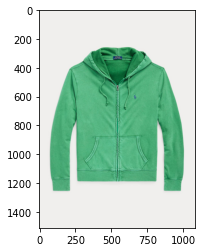

In [ ]:
imshow(image)

In [ ]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [ ]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [ ]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [ ]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [ ]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [ ]:
ordinary_mask = unpad(mask, pads)

(4, 12, 4, 12)


True

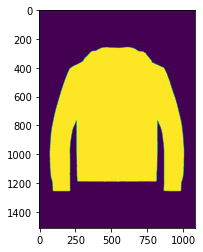

In [ ]:
imshow(ordinary_mask)
cv2.imwrite('mask.jpeg', ordinary_mask)

Now we need to invert the mask. ***1-mask*** should do the job.

*   Новый пункт
*   Новый пункт






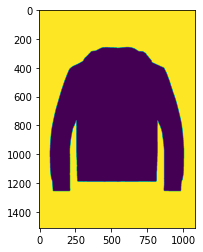

In [ ]:
inverted_mask = 1-unpad(mask, pads)
imshow(inverted_mask)

In [ ]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(inverted_mask, cv2.COLOR_GRAY2RGB) * (0, 0, 255)).astype(np.uint8), 0.5, 0)

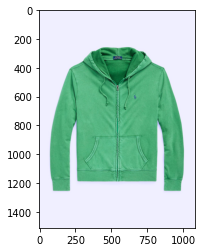

In [ ]:
imshow(dst)

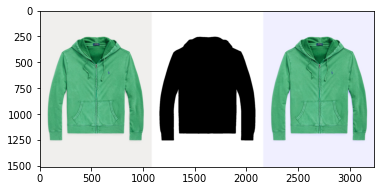

In [ ]:
imshow(np.hstack([image, cv2.cvtColor(inverted_mask, cv2.COLOR_GRAY2RGB) * 255, dst]))

Everything works fine, now mask paints the background instead of a hoodie. I hope this is the desired effect.